https://www.councilofelrond.com/subject/the-fellowship-of-the-ring-2/
<function <lambda> at 0x0000019E1B0B64C8>
{0: [('frodo', 386), ('gandalf', 273), ('ring', 150), ('aragorn', 144), ('sam', 138), ('boromir', 116), ('bilbo', 104), ('pippin', 101), ('merry', 100), ('legolas', 65), ('gimli', 56), ('looks', 54), ('hobbits', 53), ('saruman', 52), ('strider', 47), ('turns', 46), ('fellowship', 45), ('come', 39), ('arwen', 38), ('sauron', 37), ('walks', 35), ('away', 34), ('elrond', 34), ('sword', 34), ('know', 34), ('hand', 33), ('runs', 33), ('look', 33), ('suddenly', 30), ('sees', 29)]}
0
frodo, gandalf, ring, aragorn, sam, boromir, bilbo, pippin, merry, legolas, gimli, looks, hobbits, saruman


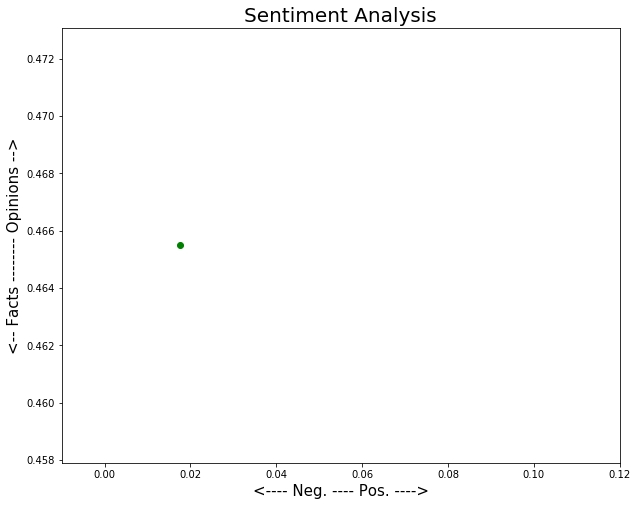

In [41]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes script data from scrapsfromtheloft.com
def url_to_lotrscript(url):
# Gives me the script from https://www.councilofelrond.com/subject/the-fellowship-of-the-ring-2/
    webpage = requests.get(url).text
    soup = BeautifulSoup(webpage, "lxml")
    text = [p.text for p in soup.find(class_="post-content").find_all('p')]
    print(url)
    return text

# URL of LOTR: The Fellowship of the Ring Script
url_1 = ['https://www.councilofelrond.com/subject/the-fellowship-of-the-ring-2/']

# Name of script for dictionary
lotr_script = ["lotr_script"]

# Request script from website
script = [url_to_lotrscript(x) for x in url_1]

# Here I pickle my script and create a new directory for the script files
for character, lines in enumerate(lotr_script):
    with open("C:/Users/Zachary/Desktop/Python Class/Final Project/Pickled Data" + lines + ".txt", "wb") as file:
        pickle.dump(script[character], file)

# Here we load up pickled files
data = {}
for character, lines in enumerate(lotr_script):
    with open("C:/Users/Zachary/Desktop/Python Class/Final Project/Pickled Data" + lines + ".txt", "rb") as file:
        data[character] = pickle.load(file)

# Double check to make sure data has been loaded properly: data.keys()
# Double check to make sure script loaded properly: data.values()

# Defining function to change the format of the script from a list of text to a string format, giving us one large paragraph of text
def combotext(textlist):
    combotext = ' '.join(textlist)
    return combotext

# Here we make the magic happen
combodata = {key: [combotext(value)] for (key, value) in data.items()}

# Check to make sure everything went smoothly with: print(combodata)

# import panda module for easy application of cleaning functions
import pandas as pd
pd.set_option('max_colwidth',100)

lotr_script = pd.DataFrame.from_dict(combodata).transpose()
lotr_script.columns = ['script']
lotr_script = lotr_script.sort_index()
lotr_script

# Now we start on the cleaning portion of the script. The first round included lowercasing text, removing punctuation and 
# removing words with numbers. Additional rounds included getting rid of ..., additional punctuation, and odd text (/n).
# It is all combined into one for clarity sake.
import re
import string

def scriptcleaner1(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

R1 = lambda x: scriptcleaner1(x)
print(R1)

# Apply all rounds of cleaning
clean_script = pd.DataFrame(lotr_script.script.apply(R1))
# Check to see what it looks like:
clean_script.script.loc[0]